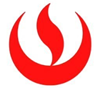

<h3 align="center">Inteligencia Artificial - WS7A</h3>

## (2) Redes Recurrentes Hopfield - Patrones de entrada NO ALEATORIOS

En el ejercicio anterior utilizamos patrones aleatorios. 
Ahora tenemos una lista de patrones de entrada estructurados: las letras de la A a la Z. 

Cada letra está representada en una cuadrícula de 10 por 10.

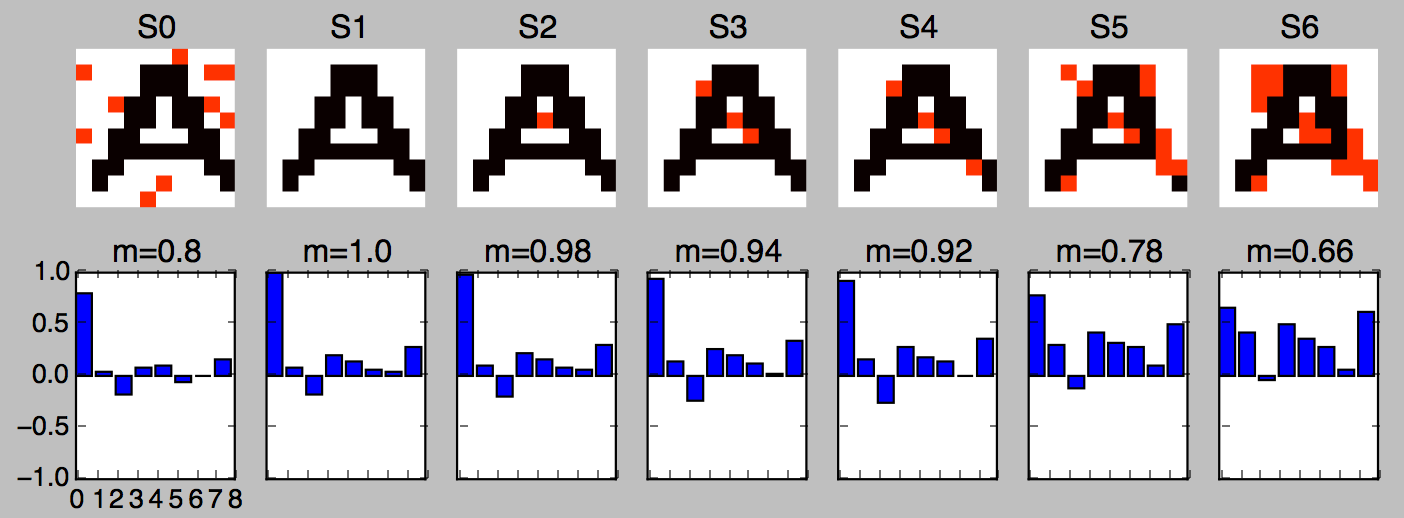
Se almacenan ocho letras (incluida la 'A') en una red Hopfield. La letra 'A' no se recupera.

Pasos a seguir:

* Ejecutar el siguiente código. 
* Leer los comentarios en línea y buscar en el código las funciones que no conoce.


#### 1. Importar librerias e inicializar patrones de entrada

Instalar previamente la libreria neurodynex3

pip install neurodynex3

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import numpy

In [4]:
# las letras que queremos almacenar en la red hopfield
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

In [5]:
abc_dictionary =pattern_tools.load_alphabet()
print("El alfabeto se almacena en un objeto de tipo: {}".format(type(abc_dictionary)))

El alfabeto se almacena en un objeto de tipo: <class 'dict'>


In [6]:
# acceder al primer elemento y obtener su tamaño (todos son del mismo tamaño)
pattern_shape = abc_dictionary['A'].shape
print("Las letras son patrones de tamaño: {}. Crea una red del tamaño correspondiente".format(pattern_shape))

Las letras son patrones de tamaño: (10, 10). Crea una red del tamaño correspondiente


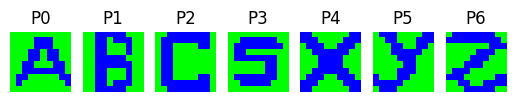

In [7]:
# crea una lista usando la sintaxis de Python List Comprehension:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

In [8]:
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

In [9]:
# almacenar los patrones
hopfield_net.store_patterns(pattern_list)

In [10]:
# crear una versión ruidosa de un patrón y utilizarla para inicializar la red
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

In [11]:
# a partir de este estado inicial, dejemos que la dinámica de la red evolucione
states = hopfield_net.run_with_monitoring(nr_steps=4)

In [12]:
# cada estado de la red es un vector. modifíquelo con la misma forma que se utilizó para crear los patrones.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

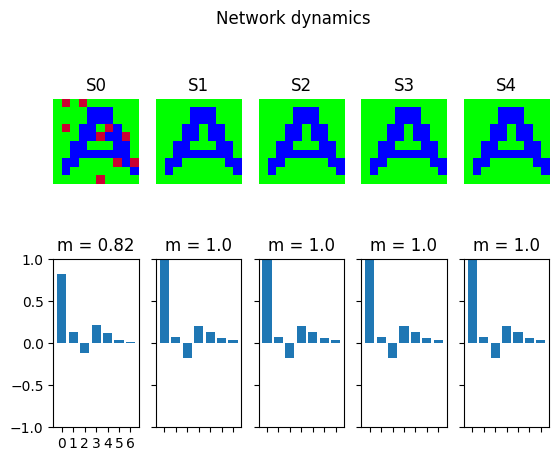

In [13]:
# trazar los estados de la red
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Fuente: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html